In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [3]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [5]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy
,Float64,Float64,Int64,Int64,Measurem…,Measurem…
1,-2.0,0.2,40,40,1.04683±7.2e-5,-4.32097±9.1e-5
2,-1.9,0.2,40,40,1.03926±7.3e-5,-4.04778±8.6e-5
3,-1.8,0.2,40,40,1.03636±8.1e-5,-3.81374±9.2e-5
4,-1.7,0.2,40,40,1.03428±7.6e-5,-3.58463±6.1e-5
5,-1.6,0.2,40,40,1.03631±0.00012,-3.39513±6.5e-5
6,-1.5,0.2,40,40,1.02056±0.00027,-3.15061±6.0e-5
7,-1.4,0.2,40,40,1.00941±0.00079,-2.93788±0.00012
8,-1.3,0.2,40,40,0.968±0.0016,-2.69914±0.00022
9,-1.2,0.2,40,40,0.8404±0.0041,-2.51483±0.00084


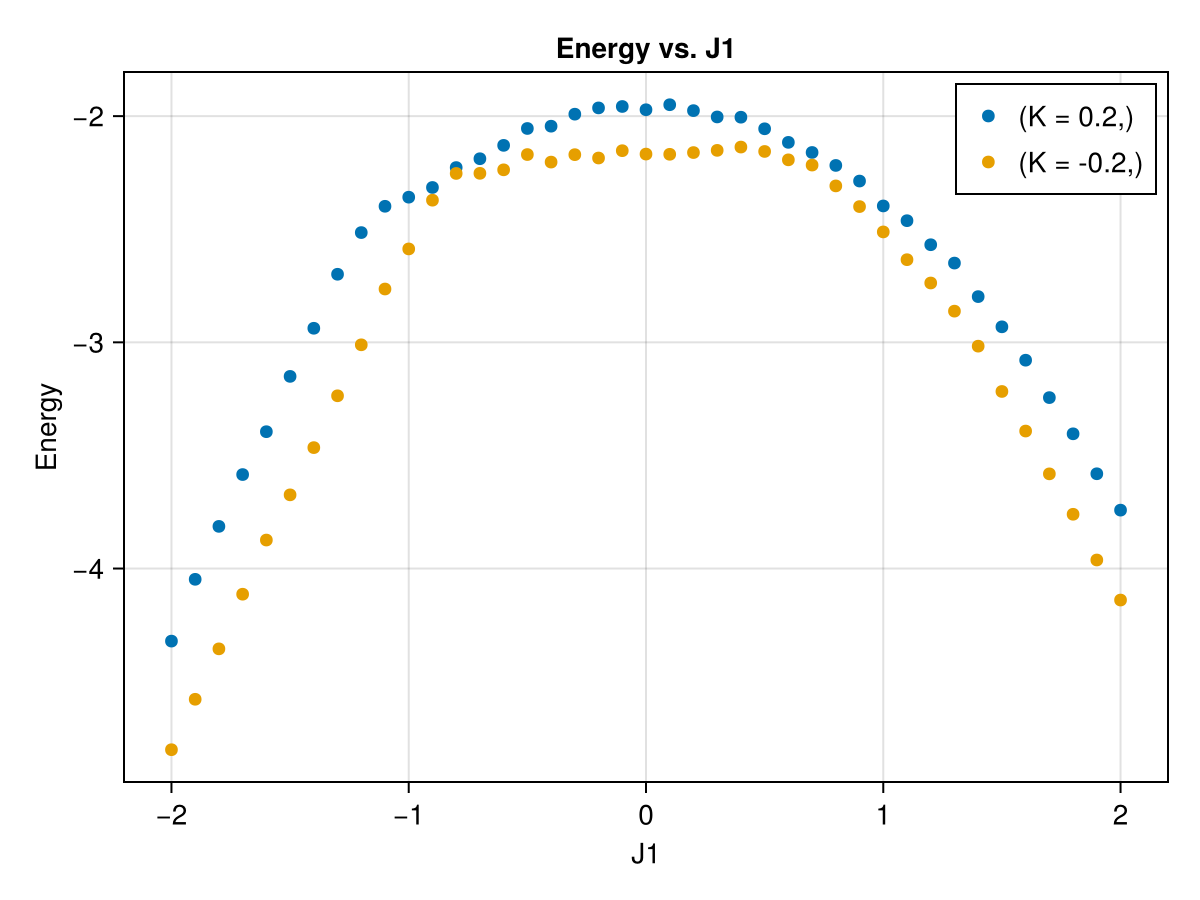

In [23]:
generatePlot(
    data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

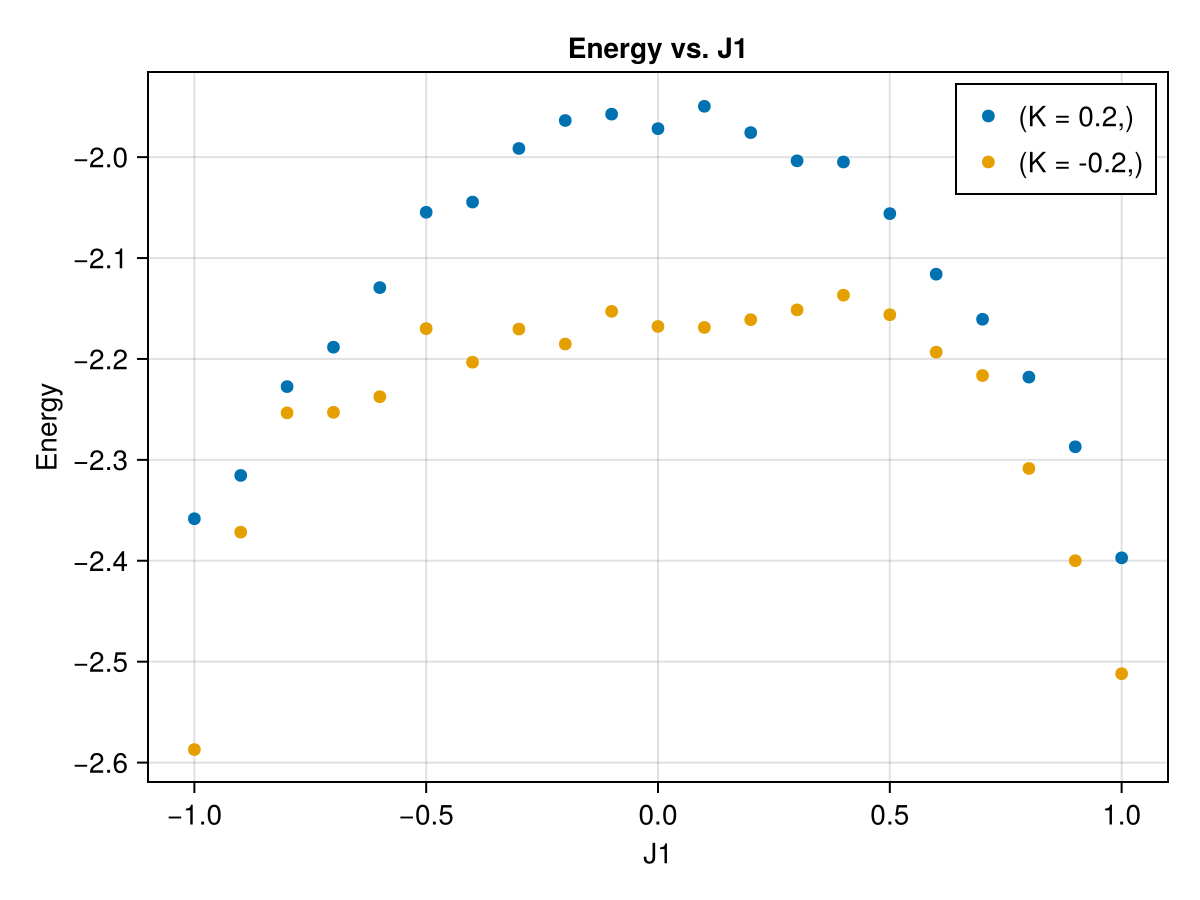

In [25]:
narrow_data = groupby(subset(data, :J1 => J1 -> -1.0 .<= J1 .<= 1.0), [:K])
generatePlot(
    narrow_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

In [26]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy
,Float64,Float64,Int64,Int64,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.2715±0.0074,-2.3604±0.0035
2,-0.95,0.2,40,40,0.1711±0.0098,-2.3458±0.0065
3,-0.9,0.2,40,40,0.1031±0.0012,-2.31731±0.00091
4,-0.85,0.2,40,40,0.0881±0.0027,-2.2786±0.0021
5,-0.8,0.2,40,40,0.094±0.0012,-2.2261±0.0013
6,-0.75,0.2,40,40,0.05942±0.00072,-2.2148±0.0016
7,-0.7,0.2,40,40,0.05838±0.00021,-2.19417±0.00083
8,-0.65,0.2,40,40,0.04±0.0013,-2.154±0.0019
9,-0.6,0.2,40,40,0.03906±0.00032,-2.12177±0.00077


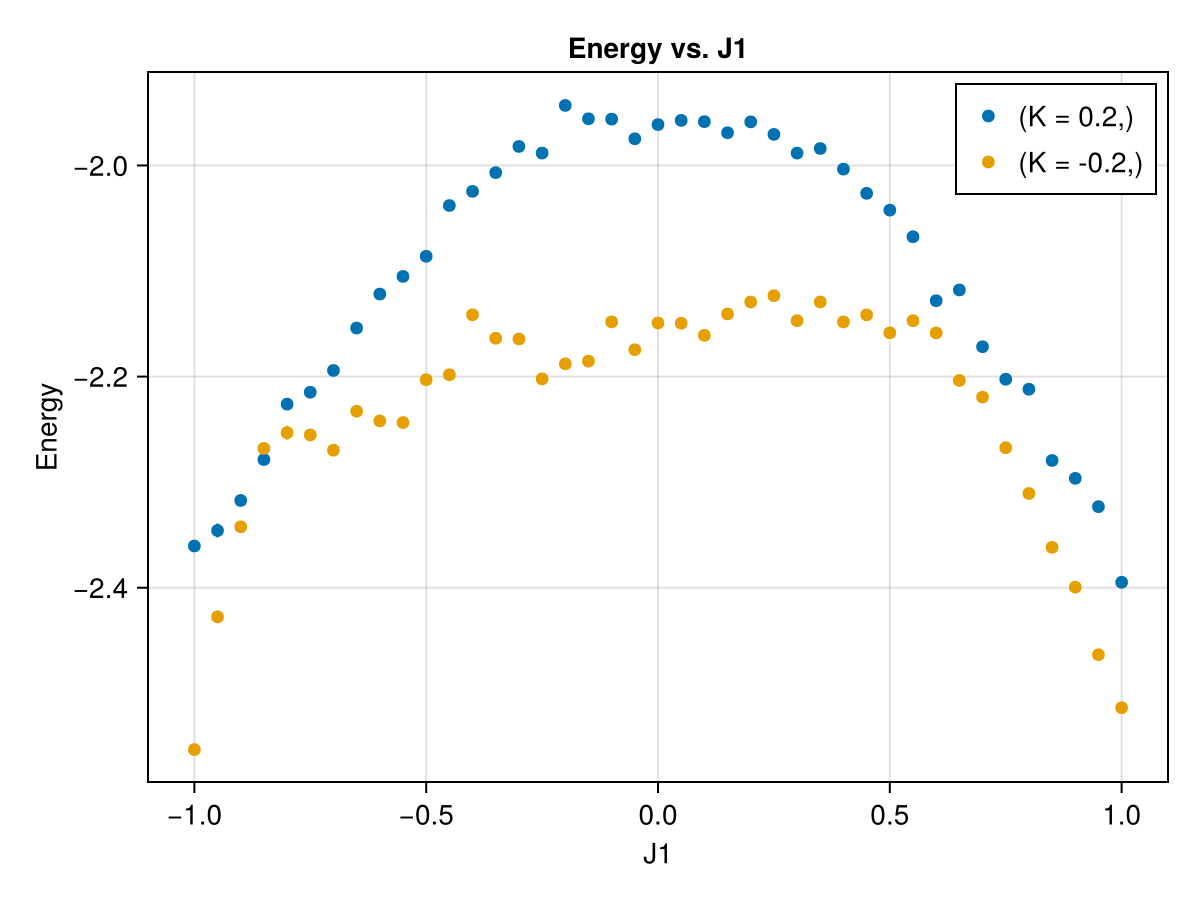

In [27]:
generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

In [7]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Magnetization vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Magnetization",
    xminorticksvisible=true
)

h5open("../jobs/test-sweep.data/task0001/run0001.meas.h5") do file
    mag_group = file["observables/Mag"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig

ErrorException: unable to determine if ../jobs/test-sweep.data/task0001/run0001.meas.h5 is accessible in the HDF5 format (file may not exist)